# Data Science I Project

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Utils

In [144]:
def create_frequency_table_with_credit_risk(index: str, df: pd.DataFrame):
    cross_table_credit_hist = pd.crosstab(df[index], dataset_df["CreditRiskLabel"], margins=True)
    cross_table_credit_hist[f"P(Bad|{index})"] = cross_table_credit_hist["Bad"]/cross_table_credit_hist["All"]
    cross_table_credit_hist[f"P(Good|{index})"] = 1 - cross_table_credit_hist[f"P(Bad|{index})"]
    return cross_table_credit_hist

## Loading Dataset

In [93]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144)

In [94]:
statlog_german_credit_data.data.original

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [95]:
metadata = statlog_german_credit_data.metadata

print("Abstract: ", metadata["abstract"])
print("Area: ", metadata["area"])
print("Number of Instances: ", metadata["num_instances"])
print("Has Missing Values: ", metadata["has_missing_values"])
print("Number of Features: ", metadata["num_features"])
print("Feature Types: ", metadata["feature_types"])
print("Demographics: ", metadata["demographics"])

Abstract:  This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix
Area:  Social Science
Number of Instances:  1000
Has Missing Values:  no
Number of Features:  20
Feature Types:  ['Categorical', 'Integer']
Demographics:  ['Other', 'Marital Status', 'Age', 'Occupation']


In [96]:
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


## Cleaning Data

In this part, the categorical features will be transformed into easier understandable data, so that the EDA can be performed 

In [97]:
dataset_df = statlog_german_credit_data.data.original

COLUMN_RENAME_DICT = {
    'Attribute1': 'CheckingAccountStatus',
    'Attribute2': 'DurationInMonths',
    'Attribute3': 'CreditHistory',
    'Attribute4': 'Purpose',
    'Attribute5': 'CreditAmount',
    'Attribute6': 'SavingsAccountBonds',
    'Attribute7': 'EmploymentSince',
    'Attribute8': 'InstallmentRate',
    'Attribute9': 'PersonalStatusSex',
    'Attribute10': 'OtherDebtorsGuarantors',
    'Attribute11': 'ResidenceSince',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'OtherInstallmentPlans',
    'Attribute15': 'Housing',
    'Attribute16': 'ExistingCreditsCount',
    'Attribute17': 'Job',
    'Attribute18': 'PeopleLiableMaintenance',
    'Attribute19': 'Telephone',
    'Attribute20': 'ForeignWorker',
    'class': 'CreditRiskClass'
}

dataset_df = dataset_df.rename(columns = COLUMN_RENAME_DICT)


Below, the mappings for the categorical data are defined

In [98]:
# Consolidated mapping dictionary for all categorical columns
categorical_mappings = {
    'CheckingAccountStatus': {
        'A11': 'Less than 0 DM',
        'A12': '0 to 200 DM',
        'A13': '200 DM or more',
        'A14': 'No checking account'
    },
    'CreditHistory': {
        'A30': 'No credits taken / all credits paid back duly', # individual has either never taken out any credits or has taken credits and has paid them all back on time
        'A31': 'All credits at this bank paid back duly', # individual has taken out credits from this particular bank and has paid them all back on time
        'A32': 'Existing credits paid back duly till now', # individual currently has existing credits and has been paying them back on time up to the present moment.
        'A33': 'Delay in paying off in the past', # individual has experienced delays in making credit payments in the past
        'A34': 'Critical account / other credits existing (not at this bank)'
    },
    'Purpose': {
        'A40': 'Car (new)',
        'A41': 'Car (used)',
        'A42': 'Furniture/equipment',
        'A43': 'Radio/television',
        'A44': 'Domestic appliances',
        'A45': 'Repairs',
        'A46': 'Education',
        'A47': 'Vacation',
        'A48': 'Retraining',
        'A49': 'Business',
        'A410': 'Others'
    },
    'SavingsAccountBonds': {
        'A61': 'Less than 100 DM',
        'A62': '100 to 500 DM',
        'A63': '500 to 1000 DM',
        'A64': '1000 DM or more',
        'A65': 'Unknown / no savings account'
    },
    'EmploymentSince': {
        'A71': 'Unemployed',
        'A72': 'Less than 1 year',
        'A73': '1 to 4 years',
        'A74': '4 to 7 years',
        'A75': '7 years or more'
    },
    'PersonalStatusSex': {
        'A91': 'Male: divorced',
        'A92': 'Female: divorced/married',
        'A93': 'Male: single',
        'A94': 'Male: married/widowed',
        'A95': 'Female: single'
    },
    'OtherDebtorsGuarantors': {
        'A101': 'None',
        'A102': 'Co-applicant',
        'A103': 'Guarantor'
    },
    'Property': {
        'A121': 'Real estate',
        'A122': 'Building society savings agreement / life insurance',
        'A123': 'Car or other, not in attribute 6',
        'A124': 'Unknown / no property'
    },
    'OtherInstallmentPlans': {
        'A141': 'Bank',
        'A142': 'Stores',
        'A143': 'None'
    },
    'Housing': {
        'A151': 'Rent',
        'A152': 'Own',
        'A153': 'For free'
    },
    'Job': {
        'A171': 'Unemployed / \n unskilled - non-resident',
        'A172': 'Unskilled - resident',
        'A173': 'Skilled employee / official',
        'A174': 'Management / self-employed / \n highly qualified employee / officer'
    },
    'Telephone': {
        'A191': 'None',
        'A192': 'Yes, registered under the customer\'s name'
    },
    'ForeignWorker': {
        'A201': 'Yes',
        'A202': 'No'
    }
}

In [99]:
# replacing codes with descriptive labels using the consolidated mappings
for column, mapping in categorical_mappings.items():
    dataset_df[column] = dataset_df[column].replace(mapping)

# Separating Personal Status from Gender in original feature "PersonalStatusSex" 
dataset_df["Gender"] = dataset_df["PersonalStatusSex"].str.extract("([A-Za-z]+)")
dataset_df["PersonalStatus"] = dataset_df["PersonalStatusSex"].str.extract("(?<=:\s)(.*)$")
dataset_df = dataset_df.drop("PersonalStatusSex", axis=1)

# Replace values of the target variable, as defined in the instructions of the dataset 
dataset_df["CreditRiskClass"] = dataset_df["CreditRiskClass"].replace(1,0) # Good payer, low risk
dataset_df["CreditRiskClass"] = dataset_df["CreditRiskClass"].replace(2,1) # Bad payer. high risk

credit_risk_class_map = ["Good", "Bad"]

dataset_df["CreditRiskLabel"] = dataset_df["CreditRiskClass"].apply(lambda risk_class: credit_risk_class_map[risk_class])

print("New columns: ", dataset_df.columns)

New columns:  Index(['CheckingAccountStatus', 'DurationInMonths', 'CreditHistory', 'Purpose',
       'CreditAmount', 'SavingsAccountBonds', 'EmploymentSince',
       'InstallmentRate', 'OtherDebtorsGuarantors', 'ResidenceSince',
       'Property', 'Age', 'OtherInstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'PeopleLiableMaintenance', 'Telephone',
       'ForeignWorker', 'CreditRiskClass', 'Gender', 'PersonalStatus',
       'CreditRiskLabel'],
      dtype='object')


## EDA

In [100]:
print(dataset_df.describe())

       DurationInMonths  CreditAmount  InstallmentRate  ResidenceSince  \
count       1000.000000   1000.000000      1000.000000     1000.000000   
mean          20.903000   3271.258000         2.973000        2.845000   
std           12.058814   2822.736876         1.118715        1.103718   
min            4.000000    250.000000         1.000000        1.000000   
25%           12.000000   1365.500000         2.000000        2.000000   
50%           18.000000   2319.500000         3.000000        3.000000   
75%           24.000000   3972.250000         4.000000        4.000000   
max           72.000000  18424.000000         4.000000        4.000000   

               Age  ExistingCreditsCount  PeopleLiableMaintenance  \
count  1000.000000           1000.000000              1000.000000   
mean     35.546000              1.407000                 1.155000   
std      11.375469              0.577654                 0.362086   
min      19.000000              1.000000                 

In [121]:

print(dataset_df.info())
number_samples = len(dataset_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CheckingAccountStatus    1000 non-null   object
 1   DurationInMonths         1000 non-null   int64 
 2   CreditHistory            1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   CreditAmount             1000 non-null   int64 
 5   SavingsAccountBonds      1000 non-null   object
 6   EmploymentSince          1000 non-null   object
 7   InstallmentRate          1000 non-null   int64 
 8   OtherDebtorsGuarantors   1000 non-null   object
 9   ResidenceSince           1000 non-null   int64 
 10  Property                 1000 non-null   object
 11  Age                      1000 non-null   int64 
 12  OtherInstallmentPlans    1000 non-null   object
 13  Housing                  1000 non-null   object
 14  ExistingCreditsCount     1000 non-null   

<Axes: >

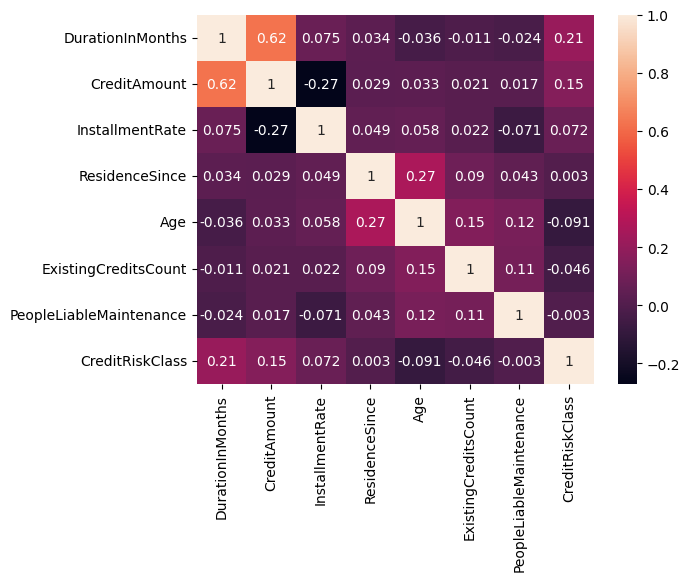

In [102]:
numerical_features = dataset_df.select_dtypes(include=["int64", "float64"])
sns.heatmap(data=numerical_features.corr(), annot=True)

In the heatmap above, it is possible to see that the CreditAmount and the DurationInMonths are the features with the highest correlation. These two correlations are correlated as well.
As expected, higher risks of default are associated with longer and higher loans.

CreditRiskLabel
Good    0.7
Bad     0.3
Name: count, dtype: float64

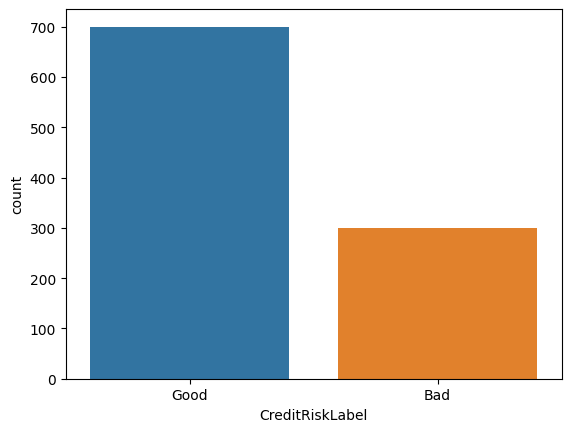

In [122]:
sns.countplot(x="CreditRiskLabel", data=dataset_df, hue="CreditRiskLabel")
dataset_df["CreditRiskLabel"].value_counts()/number_samples

<Axes: xlabel='Gender', ylabel='percent'>

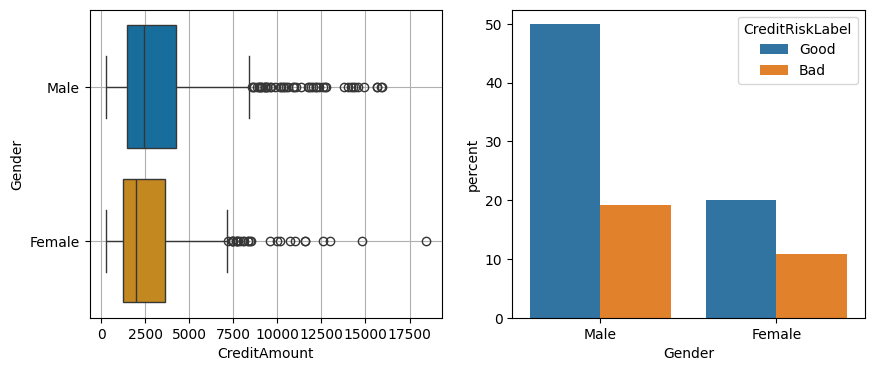

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(ax=axes[0], x="CreditAmount", y="Gender", data=dataset_df, hue="Gender", palette="colorblind")
axes[0].grid()


sns.countplot(ax=axes[1], x="Gender", hue="CreditRiskLabel", data=dataset_df, stat="percent")

(0.0, 666.75)

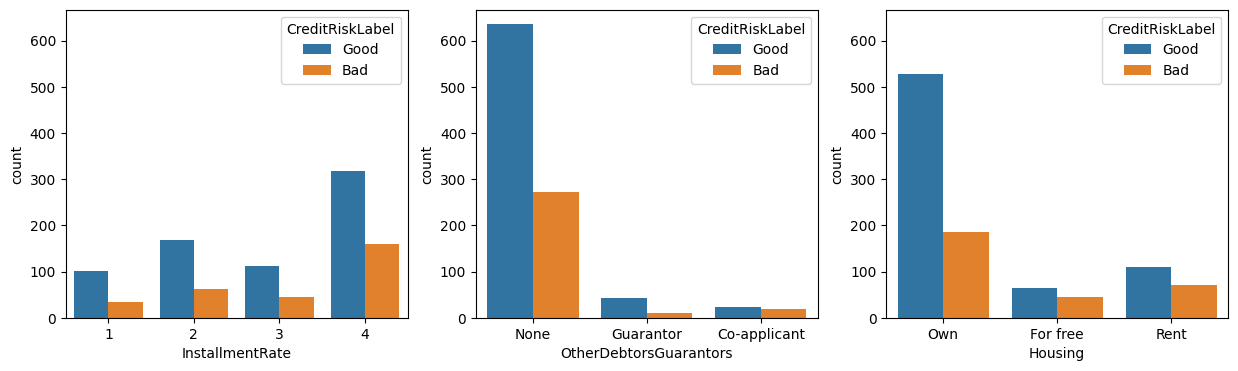

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.countplot(ax = axes[0], x="InstallmentRate", hue="CreditRiskLabel", data=dataset_df)
sns.countplot(ax = axes[1], x="OtherDebtorsGuarantors", hue="CreditRiskLabel", data=dataset_df)
sns.countplot(ax = axes[2], x="Housing", hue="CreditRiskLabel", data=dataset_df)

max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1])

# Set the same y-axis limit for both plots
axes[0].set_ylim(0, max_y)
axes[1].set_ylim(0, max_y)
axes[2].set_ylim(0, max_y)

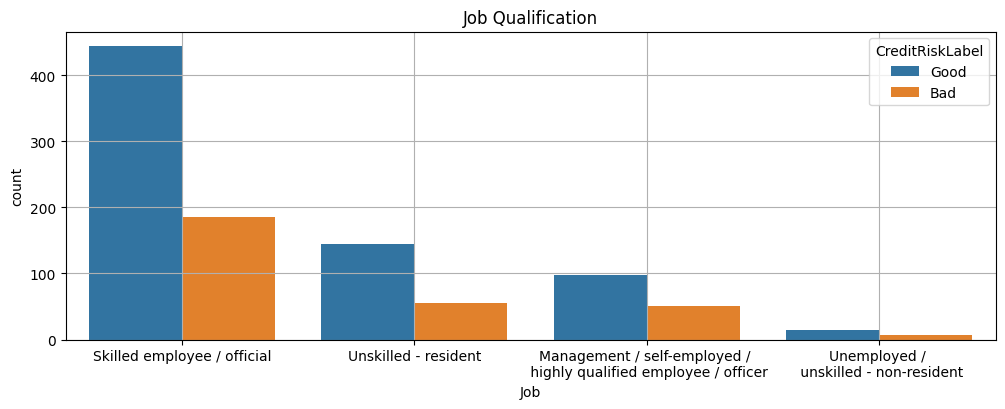

CreditRiskLabel,Bad,Good,All,P(Bad|Job),P(Good|Job)
Job,,,,,
Management / self-employed / \n highly qualified employee / officer,51,97,148,0.344595,0.655405
Skilled employee / official,186,444,630,0.295238,0.704762
Unemployed / \n unskilled - non-resident,7,15,22,0.318182,0.681818
Unskilled - resident,56,144,200,0.280000,0.720000
All,300,700,1000,0.300000,0.700000


In [145]:
plt.figure(figsize=(12, 4))
sns.countplot(x="Job", hue="CreditRiskLabel", data=dataset_df)
plt.title("Job Qualification")
plt.grid()
plt.show()

create_frequency_table_with_credit_risk(index="Job", df=dataset_df)

It is possible to note that the proportion of "Good" payers and "Bad" payers remains almost the same among different categories of jobs. It is also equal to the general percentage of good and bad payers (i.e. 70%/30%). Therefore, the feature regarding the job qualification/status seems to be not relevant for the classification task.

In [147]:
create_frequency_table_with_credit_risk(index="CreditHistory", df=dataset_df)

CreditRiskLabel,Bad,Good,All,P(Bad|CreditHistory),P(Good|CreditHistory)
CreditHistory,,,,,
All credits at this bank paid back duly,28,21,49,0.571429,0.428571
Critical account / other credits existing (not at this bank),50,243,293,0.170648,0.829352
Delay in paying off in the past,28,60,88,0.318182,0.681818
Existing credits paid back duly till now,169,361,530,0.318868,0.681132
No credits taken / all credits paid back duly,25,15,40,0.625000,0.375000
All,300,700,1000,0.300000,0.700000


The result above for the CreditHistory category "Critical account or other credits existing (not at this bank)" is counterintuitive, as one might expect individuals with a critical account history or with other loans being paid at the same time should have a higher probability of being classified as "Bad" rather than "Good". 

CreditRiskLabel,Bad,Good,All,P(Bad|CheckingAccountStatus),P(Good|CheckingAccountStatus)
CheckingAccountStatus,,,,,
0 to 200 DM,105,164,269,0.390335,0.609665
200 DM or more,14,49,63,0.222222,0.777778
Less than 0 DM,135,139,274,0.492701,0.507299
No checking account,46,348,394,0.116751,0.883249
All,300,700,1000,0.300000,0.700000


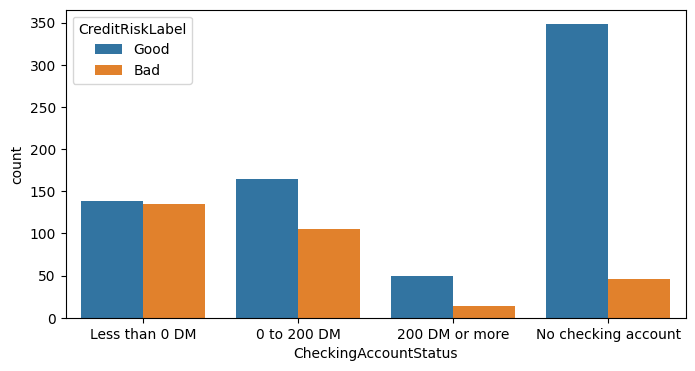

In [150]:
plt.figure(figsize=(8,4))

order_checking = ['Less than 0 DM', '0 to 200 DM', '200 DM or more', 'No checking account']

sns.countplot(x="CheckingAccountStatus", hue="CreditRiskLabel", data=dataset_df, order=order_checking)

create_frequency_table_with_credit_risk(index="CheckingAccountStatus", df=dataset_df)

<Axes: xlabel='SavingsAccountBonds', ylabel='count'>

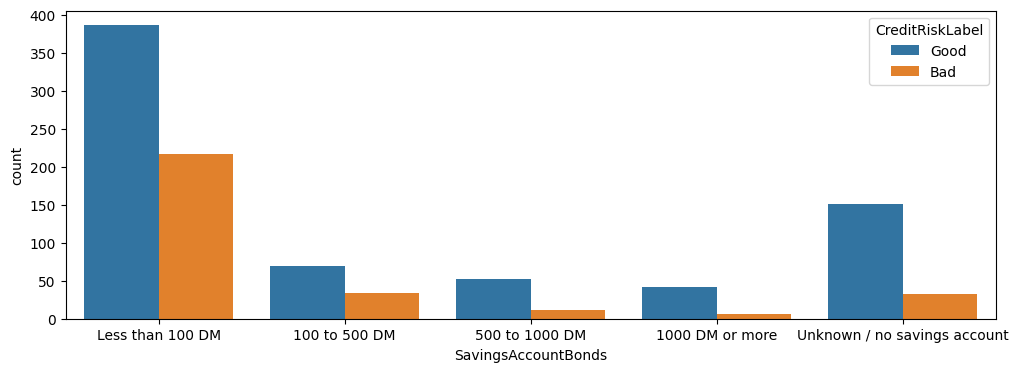

In [137]:
plt.figure(figsize=(12,4))
order_savings = ['Less than 100 DM','100 to 500 DM','500 to 1000 DM', '1000 DM or more', 'Unknown / no savings account']
sns.countplot(x="SavingsAccountBonds", hue="CreditRiskLabel", data=dataset_df, order=order_savings)

In [ ]:
pd.